In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
def load_data(data_path='data/'):
    train = os.path.join(data_path, "train.csv")
    test = os.path.join(data_path, "test.csv")
    return pd.read_csv(train), pd.read_csv(test)

In [3]:
train_df, test_df = load_data()

In [4]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###  2. Data Processing steps from another Apapiu

/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


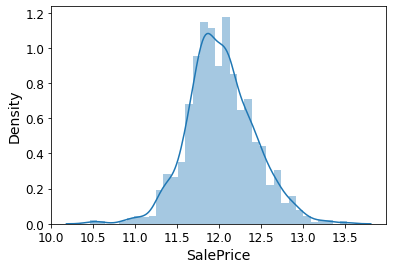

In [5]:
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price + 1)":np.log1p(train_df["SalePrice"])})
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])
sns.distplot(train_df['SalePrice']);

In [6]:
# Drop Id column, and the target variable

train = train_df.drop('Id', axis=1)

test_ids = test_df['Id'].copy()
test = test_df.drop('Id', axis=1)

train.loc[:,'Train'] = 1
test.loc[:,'Train'] = 0

housing_df = pd.concat([train,test], ignore_index=True)

train_labels = train["SalePrice"].copy()
train = train.drop("SalePrice", axis=1) # drop labels for training set

In [7]:
#### Type of features

train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)

num_attribs = train.select_dtypes([np.number]).columns

cat_attribs = train.select_dtypes(include=[np.object]).columns

print('numerical:{} \n\n categorical:{}'.format(num_attribs, cat_attribs))

numerical:Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Train'],
      dtype='object') 

 categorical:Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2

In [8]:
# Log transform the columns with high skew

skewed_cols = num_attribs[train[num_attribs].skew() > 0.75]
train[skewed_cols] = np.log1p(train[skewed_cols])
test[skewed_cols] = np.log1p(test[skewed_cols])

train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Train
0,60,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal,1
1,20,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal,1
2,60,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal,1
3,70,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml,1
4,60,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal,1


In [9]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Train              0
Length: 80, dtype: int64

In [10]:
# from sklearn.impute import SimpleImputer
# #select numerical
# train_num = train.select_dtypes(include=[np.number])

# #train imputer - returns array
# imputer = SimpleImputer(strategy="mean")
# imputer.fit(train_num)
# X = imputer.transform(train_num)

# #if you want to put it back to dataframe
# train_tr = pd.DataFrame(X, columns=train_num.columns,
#                           index=train.index)

# from sklearn.preprocessing import OneHotEncoder

#encoding categorical
# cat_encoder = OneHotEncoder(sparse=False)
# train_cat_1hot = cat_encoder.fit_transform(train_cat)
# train_cat_1hot

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown='ignore',sparse=False)),
    ])

In [12]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

train_prepared = full_pipeline.fit_transform(train)

In [13]:
train_prepared.shape

(1460, 303)

In [14]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(train_prepared, train_labels)

Ridge(alpha=0.1)

In [15]:
from sklearn.metrics import mean_squared_error

train_predictions = ridge_reg.predict(train_prepared)
ridge_mse = mean_squared_error(train_labels, train_predictions)
ridge_rmse = np.sqrt(ridge_mse)
print('rmse on training:', ridge_rmse)

rmse on training: 0.09205067463579863


In [16]:
test_prepared = full_pipeline.transform(test)
test_predictions = ridge_reg.predict(test_prepared)
test_predictions = np.expm1(test_predictions)
# test_predictions

In [17]:
def prep_to_submit(ids, preds, fname='submission.csv'):
    preds = pd.DataFrame({'Id': ids, 'SalePrice': preds})
    preds.to_csv(fname, index=False)

In [18]:
prep_to_submit(test_ids, test_predictions, fname='submission_ridge.csv')
print('this submission scored: ', 0.13636)

this submission scored:  0.13636


Looks like the model did not generalize well to the unseen data

### 3.  Ridge vs Lasso / Hyperparameter tuning

In [19]:
## LASSO

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(train_prepared, train_labels)

train_predictions = lasso_reg.predict(train_prepared)
lasso_mse = mean_squared_error(train_labels, train_predictions)
lasso_rmse = np.sqrt(lasso_mse)
print('At alpha=0.1: ridge_rmse: {}, lasso_rmse: {}'.format(ridge_rmse, lasso_rmse))

At alpha=0.1: ridge_rmse: 0.09205067463579863, lasso_rmse: 0.21490794092143337


- With the current parameters, ridge seems to perform better

In [20]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(ridge_reg, train_prepared, train_labels, scoring='neg_mean_squared_error', cv=10)

In [21]:
# import joblib
# def save_model(model, fname="model.pkl"):
#     joblib.dump(model, fname)
# def load_model(fname):
#     return joblib.load(fname)

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}]

ridge_reg = Ridge()
lasso_reg = Lasso()

ridge_grid = GridSearchCV(ridge_reg, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
lasso_grid = GridSearchCV(lasso_reg, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

ridge_grid.fit(train_prepared, train_labels)
lasso_grid.fit(train_prepared, train_labels)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid=[{'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                    0.1, 0.5, 1, 5, 10, 50, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [23]:
for mean_score, params in zip(ridge_grid.cv_results_["mean_test_score"], ridge_grid.cv_results_["params"]):
    print(np.sqrt(-mean_score), params)

0.1399970837102057 {'alpha': 0.0001}
0.13998204621902183 {'alpha': 0.0005}
0.1399633307946899 {'alpha': 0.001}
0.13981676882387867 {'alpha': 0.005}
0.13964103284947976 {'alpha': 0.01}
0.13846589331037493 {'alpha': 0.05}
0.13737323826877734 {'alpha': 0.1}
0.1332081052374154 {'alpha': 0.5}
0.1310301522816308 {'alpha': 1}
0.12710067218711385 {'alpha': 5}
0.12635262327819696 {'alpha': 10}
0.12737402268099124 {'alpha': 50}
0.12913962093195266 {'alpha': 100}


In [24]:
for mean_score, params in zip(lasso_grid.cv_results_["mean_test_score"], lasso_grid.cv_results_["params"]):
    print(np.sqrt(-mean_score), params)

0.12867433485980362 {'alpha': 0.0001}
0.12324352807097559 {'alpha': 0.0005}
0.12471209745978114 {'alpha': 0.001}
0.13770486393277845 {'alpha': 0.005}
0.14174476400931235 {'alpha': 0.01}
0.17330675179361027 {'alpha': 0.05}
0.21613648276820197 {'alpha': 0.1}
0.39956841578485275 {'alpha': 0.5}
0.39956841578485275 {'alpha': 1}
0.39956841578485275 {'alpha': 5}
0.39956841578485275 {'alpha': 10}
0.39956841578485275 {'alpha': 50}
0.39956841578485275 {'alpha': 100}


In [25]:
print('At tuned alphas - best scores: ridge_rmse: {}, lasso_rmse: {}'.format(min(np.sqrt(-ridge_grid.cv_results_['mean_test_score'])), min(np.sqrt(-lasso_grid.cv_results_['mean_test_score']))))

At tuned alphas - best scores: ridge_rmse: 0.12635262327819696, lasso_rmse: 0.12324352807097559


- With the optimized alphas, lasso performed slightly better

In [26]:
from sklearn.model_selection import cross_val_score

def display_scores(model, X, y, cv=10):
    scores = cross_val_score(model, X, y, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv)
    print(str(model.__class__.__name__) + '; mean_rmse: {}'.format((np.sqrt(-scores)).mean()) + ', std_rmse: {}'.format((np.sqrt(-scores)).std()))

### 4. Number of nonzero coefficients Lasso vs regularization parameter

In [27]:
alphas = [1e-4, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
num_nonzeros = []
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(train_prepared, train_labels)
    num_nonzeros.append(sum(lasso_reg.coef_>1e-3))    

Text(0, 0.5, 'nonzero coefficient count')

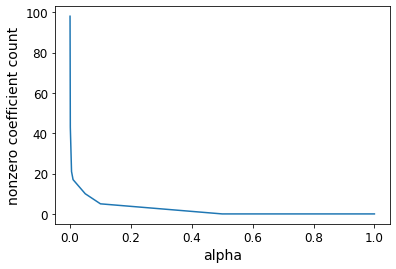

In [28]:
plt.plot(alphas, num_nonzeros)
plt.xlabel('alpha')
plt.ylabel('nonzero coefficient count')

### 5. Ensembling and Stacking

In [29]:
from sklearn.ensemble import StackingRegressor

estimators = [('r', ridge_grid),
              ('l', lasso_grid)
             ]

stacking_model = StackingRegressor(estimators=estimators, passthrough=True)
#passthrough param if set true trains the final estimator both on training data and prev predictors predictions

In [30]:
stacking_model.fit(train_prepared, train_labels);

In [31]:
display_scores(stacking_model, train_prepared, train_labels)

StackingRegressor; mean_rmse: 0.12201283432947767, std_rmse: 0.02157228760282766


In [32]:
test_prepared = full_pipeline.transform(test)
test_predictions = stacking_model.predict(test_prepared)
test_predictions = np.expm1(test_predictions)

prep_to_submit(test_ids, test_predictions, fname='submission_stacking_model.csv')

In [33]:
print('Score from the described stacking method in the problem: ', 0.13344)

Score from the described stacking method in the problem:  0.13344


Stacked model performed slightly better than ridge regression submission from 2.

### 6. XGBoost

In [34]:
import xgboost

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'max_depth': randint(low=1, high=20),
        'eta': [0.01, 0.05, 0.1, 0.5, 1],
        'subsample' : [0.1, 0.25, 0.5, 0.75, 1],
        'n_estimators' : randint(low=150, high=500),
    }

xgb_reg = xgboost.XGBRegressor(silent=True, early_stopping_rounds=5)

rnd_search = RandomizedSearchCV(xgb_reg, param_distributions=param_distribs,
                                n_iter=20, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_prepared, train_labels)


[10:13:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=5, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=20, n_jobs=-1,
                   para

In [35]:
display_scores(rnd_search, train_prepared, train_labels)

RandomizedSearchCV; mean_rmse: 0.12709837151975073, std_rmse: 0.01698834128327335


XGBoost performed the best amongst the other model tested